# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

<font color='Black' size='4'>a) Importing Packages </font>

In [136]:
# TODO: show visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from sklearn.utils import resample
from sklearn import preprocessing
import sys
from IPython.display import Markdown as md
import missingno as msno
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings("ignore")

In [137]:
#Helper Functions:
def impute_zero(dataframe,columns):
    for column in columns:
        dataframe[column].fillna(0, inplace = True)

def impute_category(dataframe, column, default_string):
    dataframe[column].fillna(default_string, inplace = True)

def impute_mean(dataframe, column):
    dataframe[[column]] = dataframe[[column]].fillna(value = dataframe[column].mean())

def impute_mode(dataframe, column):
    dataframe[[column]] = dataframe[[column]].fillna(value = dataframe[column].mode())

def impute_median(dataframe, column):
    dataframe[[column]] = dataframe[[column]].fillna(value = dataframe[column].median())

In [138]:
'''Reading the training and test data'''
training_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

'''Creating the dataframes'''
training_dataframe = pd.DataFrame(training_data)
test_dataframe = pd.DataFrame(test_data)

___

<font color='Black' size='4'>b) Describing the variables and data statistics</font>

In [139]:
'''Analysing the training data'''
training_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [140]:
'''Analysing the test data'''
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [141]:
print("Training Data : Number of columns - ",training_data.shape[1], " and number of rows - ",training_data.shape[0])
print("Test Data     : Number of columns - ",test_data.shape[1], " and number of rows - ",test_data.shape[0])
print("Test Data does not have the target SalePrice feature")

Training Data : Number of columns -  81  and number of rows -  1460
Test Data     : Number of columns -  80  and number of rows -  1459
Test Data does not have the target SalePrice feature


In [142]:
'''Describing the dataset'''
training_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


---
<font color='Black' size='4'>c) Removing features which have majority null values</font>

<font color='black' size='3'>Understanding the first 40 variables</font>

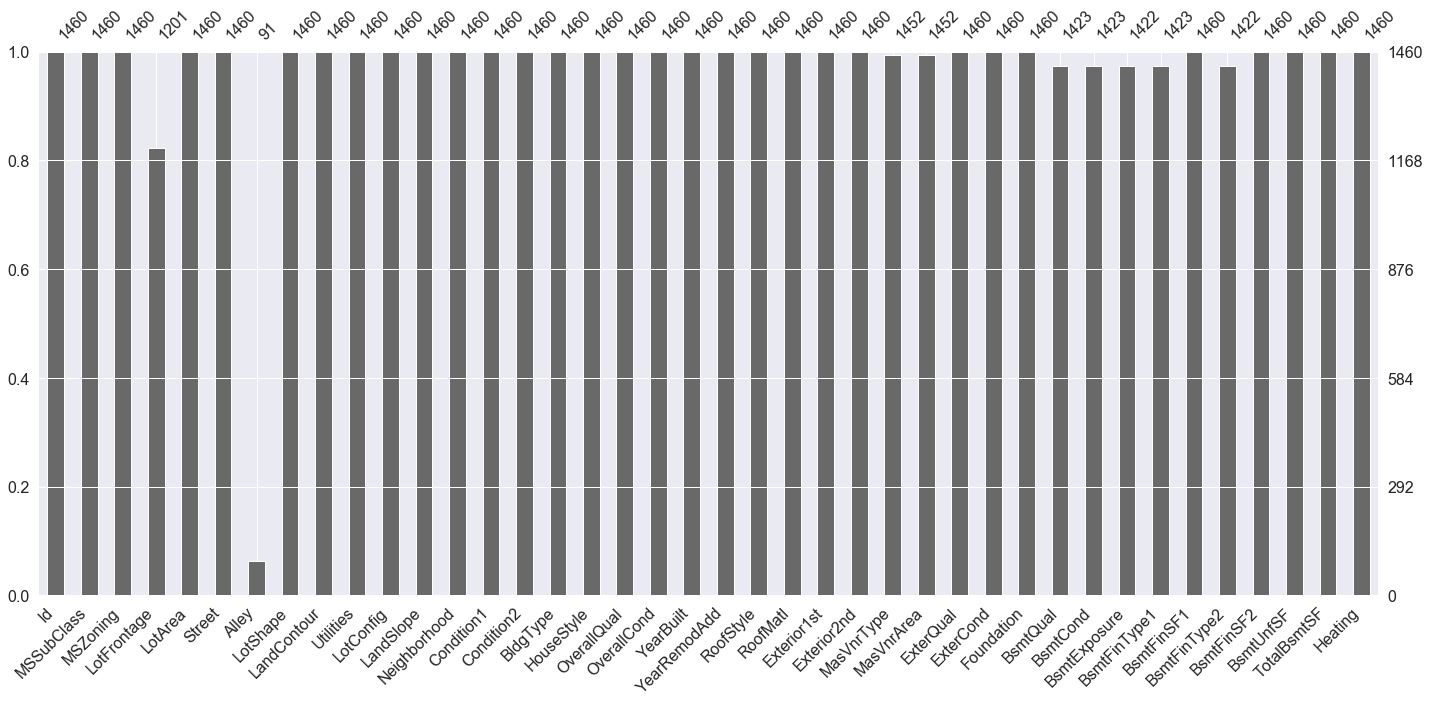

In [143]:
msno.bar(training_data.iloc[:,0:40])

As visible, the feature 'Alley' has the most number of null values, hence, we can drop this feature.

<font color='black' size='3'>Understanding the next 41 variables</font>

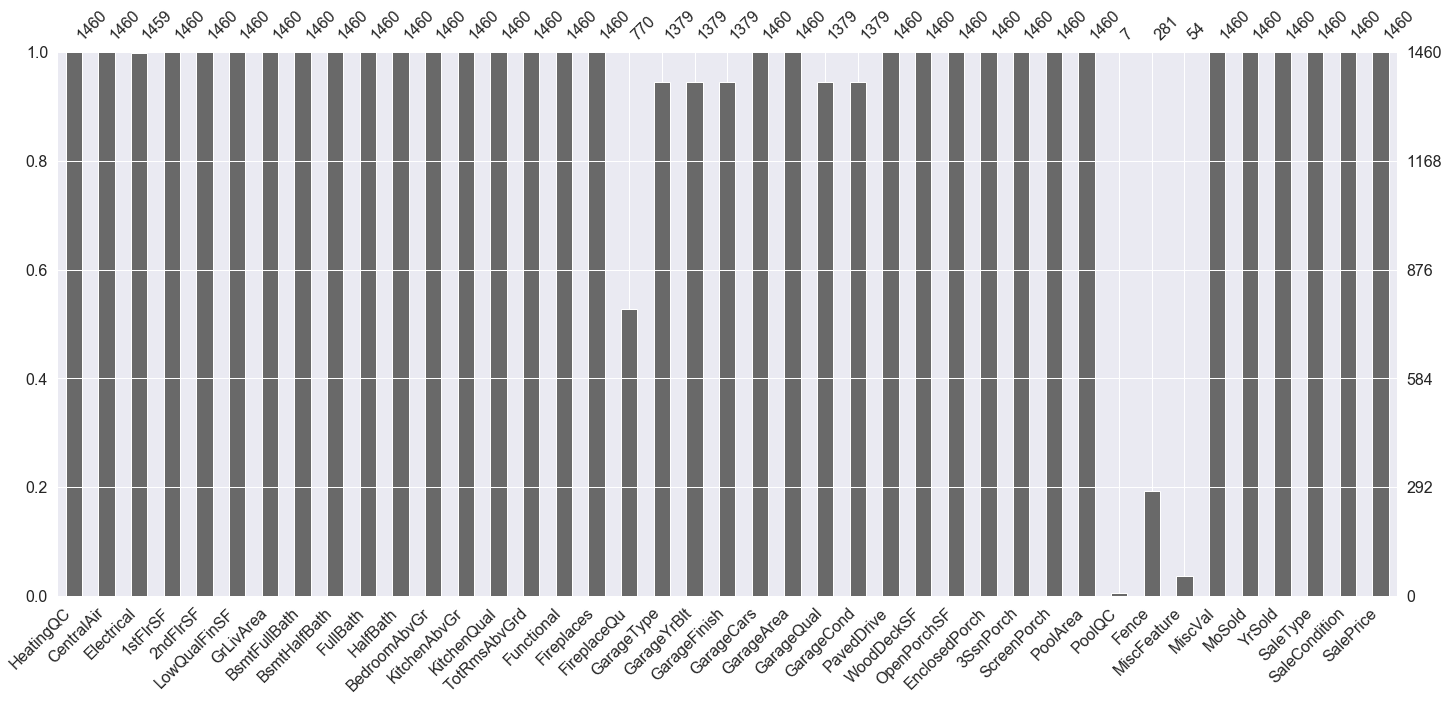

In [144]:
msno.bar(training_data.iloc[:,40:81])

As visible, features like 'FireplaceQu', 'PoolQC', 'Fence' and 'MiscFeature' can also be dropped since they have null as majority values.

In [145]:
'''Dropping columns with maximum null values'''
training_dataframe = training_dataframe.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)
test_dataframe = test_dataframe.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

---
<font color='Black' size='4'>d) Extracting the data by types and imputing</font>

In [146]:
'''Extracting numerical data'''
training_dataframe_numerical = training_dataframe.select_dtypes(include = ['int64', 'float64'])
print("Number of numerical features - ", training_dataframe_numerical.shape[1])
print("\nThe extracted features are - ")
display(training_dataframe_numerical.columns)

Number of numerical features -  38

The extracted features are - 


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [147]:
'''Extracting categorical data'''
training_dataframe_this = training_dataframe.copy()
training_dataframe_string = training_dataframe.select_dtypes(include = ['object'])
print("Number of non-numerical features - ", training_dataframe_string.shape[1])
print("\nThe extracted features are - ")
training_dataframe_string.columns

Number of non-numerical features -  38

The extracted features are - 


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [148]:
'''Converting categorical data to numeric type'''

# Doing the following assignments for each value since they portray a relationship
#   5 Ex   Excellent         
#   4 Gd   Good
#   3 TA   Average/Typical
#   2 Fa   Fair
#   1 Po   Poor

training_dataframe_converted = training_dataframe.copy()
test_dataframe_converted = test_dataframe.copy()

for col in training_dataframe_string.columns:
    training_dataframe_converted.loc[(training_dataframe_converted[col] == 'Ex',col)] = 5
    training_dataframe_converted.loc[(training_dataframe_converted[col] == 'Gd',col)] = 4
    training_dataframe_converted.loc[(training_dataframe_converted[col] == 'TA',col)] = 3
    training_dataframe_converted.loc[(training_dataframe_converted[col] == 'Fa',col)] = 2
    training_dataframe_converted.loc[(training_dataframe_converted[col] == 'Po',col)] = 1
    
    test_dataframe_converted.loc[(test_dataframe_converted[col] == 'Ex',col)] = 5
    test_dataframe_converted.loc[(test_dataframe_converted[col] == 'Gd',col)] = 4
    test_dataframe_converted.loc[(test_dataframe_converted[col] == 'TA',col)] = 3
    test_dataframe_converted.loc[(test_dataframe_converted[col] == 'Fa',col)] = 2
    test_dataframe_converted.loc[(test_dataframe_converted[col] == 'Po',col)] = 1

In [149]:
'''Creating new columns from existing columns which capture similar information'''

training_dataframe_converted['TotalSurface']=training_dataframe_converted['TotalBsmtSF'] + training_dataframe_converted['1stFlrSF'] + training_dataframe_converted['2ndFlrSF']
training_dataframe_converted['TotalSquareFoot'] = (training_dataframe_converted['BsmtFinSF1'] + training_dataframe_converted['BsmtFinSF2'] +
training_dataframe_converted['1stFlrSF'] + training_dataframe_converted['2ndFlrSF'])
training_dataframe_converted['TotalBathrooms'] = (training_dataframe_converted['FullBath'] + (0.5 * training_dataframe_converted['HalfBath']) +
training_dataframe_converted['BsmtFullBath'] + (0.5 * training_dataframe_converted['BsmtHalfBath']))
training_dataframe_converted['TotalPorchArea'] = (training_dataframe_converted['OpenPorchSF'] + training_dataframe_converted['3SsnPorch'] +
training_dataframe_converted['EnclosedPorch'] + training_dataframe_converted['ScreenPorch'] + training_dataframe_converted['WoodDeckSF'])


test_dataframe_converted['TotalSurface']=test_dataframe_converted['TotalBsmtSF'] + test_dataframe_converted['1stFlrSF'] + test_dataframe_converted['2ndFlrSF']
test_dataframe_converted['TotalSquareFoot'] = (test_dataframe_converted['BsmtFinSF1'] + test_dataframe_converted['BsmtFinSF2'] +
test_dataframe_converted['1stFlrSF'] + test_dataframe_converted['2ndFlrSF'])
test_dataframe_converted['TotalBathrooms'] = (test_dataframe_converted['FullBath'] + (0.5 * test_dataframe_converted['HalfBath']) +
test_dataframe_converted['BsmtFullBath'] + (0.5 * test_dataframe_converted['BsmtHalfBath']))
test_dataframe_converted['TotalPorchArea'] = (test_dataframe_converted['OpenPorchSF'] + test_dataframe_converted['3SsnPorch'] +
test_dataframe_converted['EnclosedPorch'] + test_dataframe_converted['ScreenPorch'] + test_dataframe_converted['WoodDeckSF'])



In [150]:
training_dataframe_converted = training_dataframe_converted.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF'],axis=1)
training_dataframe_converted.shape

test_dataframe_converted = test_dataframe_converted.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF'],axis=1)
test_dataframe_converted.shape


(1459, 65)

## Part 1 - Pairwise Correlations

---
<font color='Black' size='4'>a) Feature selection using Pearson Correlation</font>

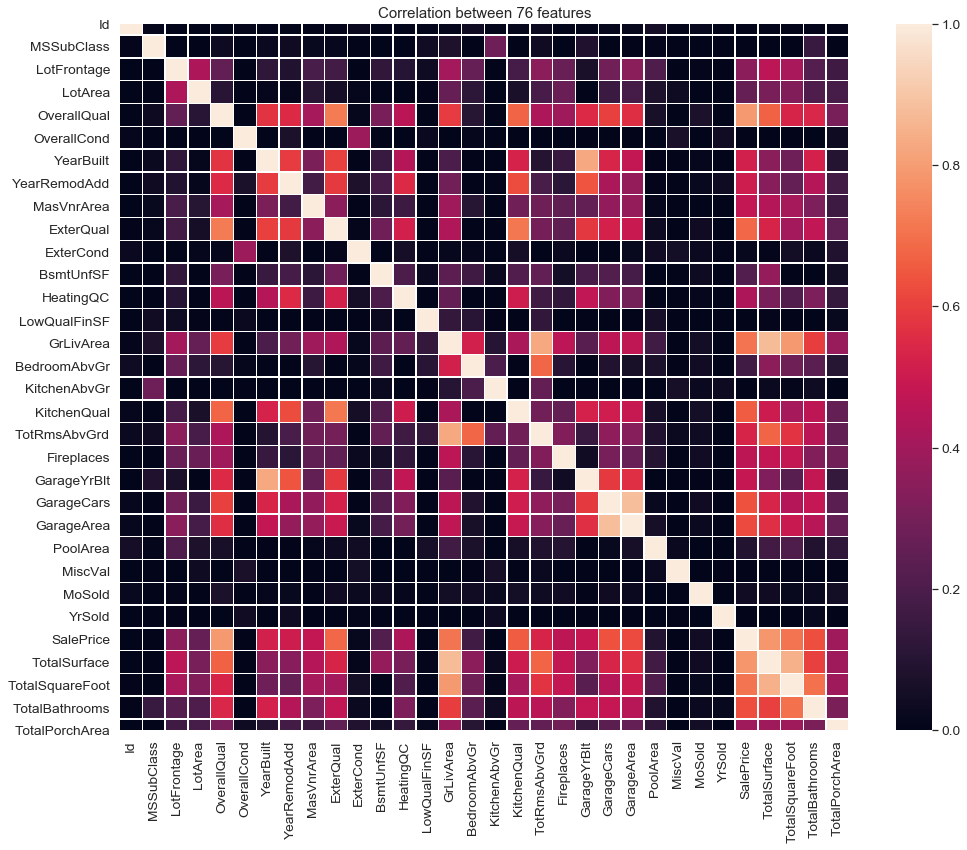

In [151]:
'''Creating a heat map with 76 features which includes the categorical features converted to numerical values'''
correlation = training_dataframe_converted.corr(method='pearson')
plt.subplots(figsize=(17, 13))
plt.title("Correlation between 76 features")
sns.heatmap(correlation, linewidths=.5, vmin=0, vmax=1, square=True)

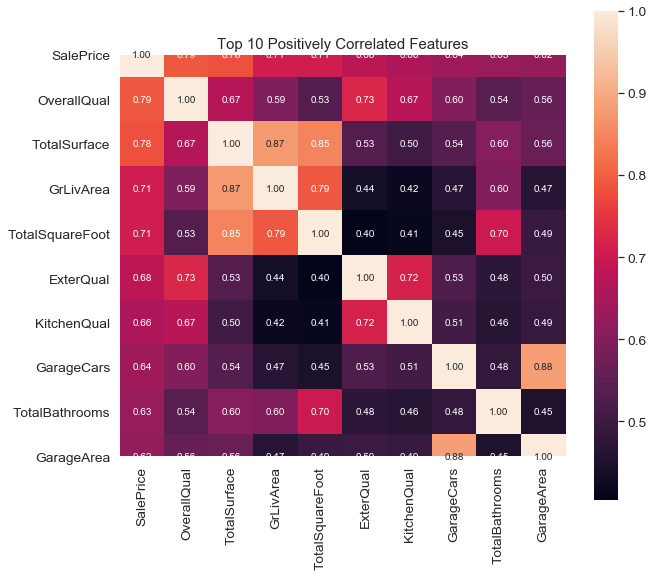

In [152]:
'''Using the nlargest function to get the highly POSITIVE correlated values'''
numberOfVariablesToBeSelected = 10
columns = correlation.nlargest(numberOfVariablesToBeSelected, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(training_dataframe_converted[columns].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.title("Top 10 Positively Correlated Features")
plt.show()

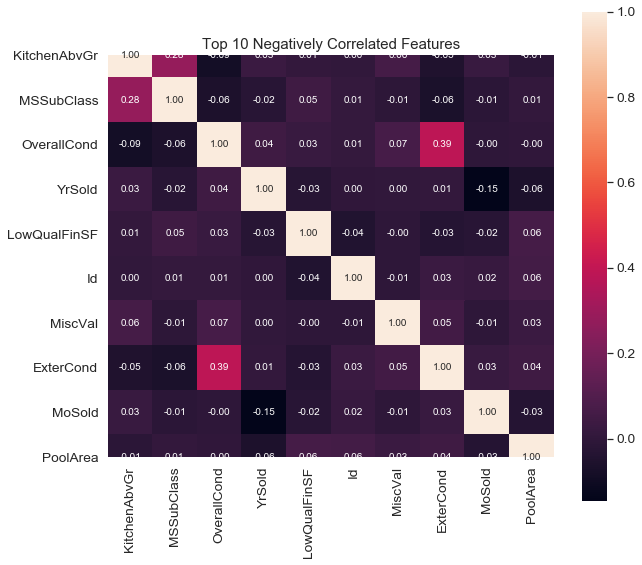

In [153]:

'''Using the nsmallest function to get the highly NEGATIVE correlated values'''
numberOfVariablesToBeSelected = 10
columns = correlation.nsmallest(numberOfVariablesToBeSelected, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(training_dataframe_converted[columns].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10, 9))
plt.title("Top 10 Negatively Correlated Features")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

---
<font color='Black' size='4'>b) Most positive and negative correlations</font>

In [154]:
'''Most positively correlated feature'''
top15CorrelatedFeatures = correlation.nlargest(15,'SalePrice')['SalePrice']

print('Most positively correlated features are GarageArea and GarageCars - ',0.882475,'as Pearson Coefficient between them.')

Most positively correlated features are GarageArea and GarageCars -  0.882475 as Pearson Coefficient between them.


In [155]:
'''Most negatively correlated feature'''
top10NegativelyCorrelatedFeatures = correlation.nsmallest(10,'SalePrice')['SalePrice']

print('Most negatively correlated features are OverallCond and YearBlt ',-0.375983,' as Pearson Coefficient between them.')



Most negatively correlated features are OverallCond and YearBlt  -0.375983  as Pearson Coefficient between them.


---
<font color='Black' size='4'>c) Features selected for analysis</font>

<font color='Blue' size='3'>Since GarageCars and GarageArea are highly correlated and denote more or less the same thing, dropping GarageArea</font>

In [156]:
test_dataframe_converted

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSurface,TotalSquareFoot,TotalBathrooms,TotalPorchArea
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,6,2010,WD,Normal,1778.0,1508.0,1.0,260
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,12500,6,2010,WD,Normal,2658.0,2252.0,1.5,429
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,3,2010,WD,Normal,2557.0,2420.0,2.5,246
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,6,2010,WD,Normal,2530.0,2206.0,2.5,396
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,1,2010,WD,Normal,2560.0,1543.0,2.0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,6,2006,WD,Normal,1638.0,1092.0,1.5,0
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,4,2006,WD,Abnorml,1638.0,1344.0,1.5,24
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,9,2006,WD,Abnorml,2448.0,2448.0,2.0,474
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,700,7,2006,WD,Normal,1882.0,1307.0,1.5,112


In [157]:
'''List of features selected'''
print('Following are the features selected - ')
count = 1

# Dropping GarageArea
if 'GarageArea' in top15CorrelatedFeatures:
    top15CorrelatedFeatures = top15CorrelatedFeatures.drop(['GarageArea'])

selected_features = []
'''Top highly positive - 11 in number'''
for feature in top15CorrelatedFeatures.index:
    if count == 12:
        break
    print(count,'',feature)
    selected_features.append(feature)
    count=count+1

'''Top highly negative - 4 in number'''
for feature in top10NegativelyCorrelatedFeatures.index:
    if count == 16:
        break
    print(count,'',feature)
    selected_features.append(feature)
    count=count+1
    
'''Dataframe with selected features'''    
feature_dataframe = pd.DataFrame(training_dataframe_converted[selected_features])

selected_features_test = selected_features.copy()
selected_features_test.remove('SalePrice')
feature_dataframe_test = pd.DataFrame(test_dataframe_converted[selected_features_test])

Following are the features selected - 
1  SalePrice
2  OverallQual
3  TotalSurface
4  GrLivArea
5  TotalSquareFoot
6  ExterQual
7  KitchenQual
8  GarageCars
9  TotalBathrooms
10  TotRmsAbvGrd
11  YearBuilt
12  KitchenAbvGr
13  MSSubClass
14  OverallCond
15  YrSold


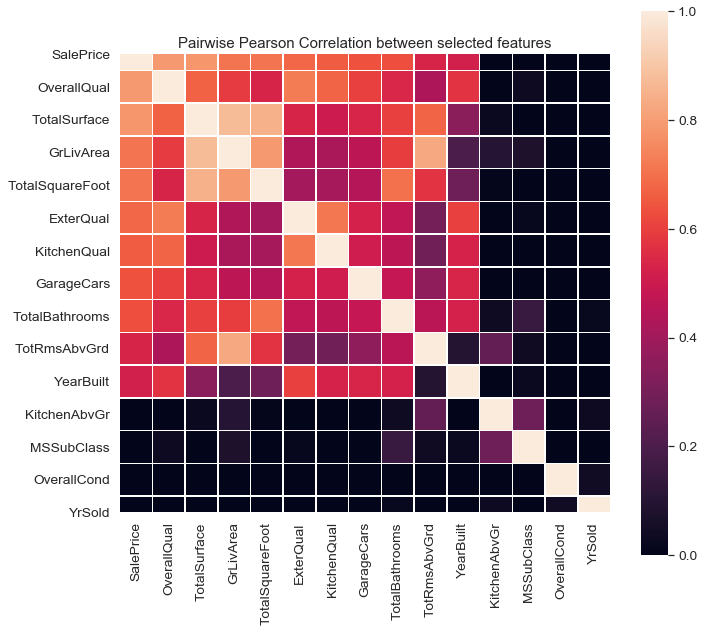

In [158]:
correlation_features = feature_dataframe.corr(method='pearson')
plt.subplots(figsize=(11, 10))
plt.title("Pairwise Pearson Correlation between selected features")
sns.heatmap(correlation_features, linewidths=.5, vmin=0, vmax=1, square=True)

## Part 2 - Informative Plots

<font color='Black' size='4'>a) Interesting Plot 1</font>

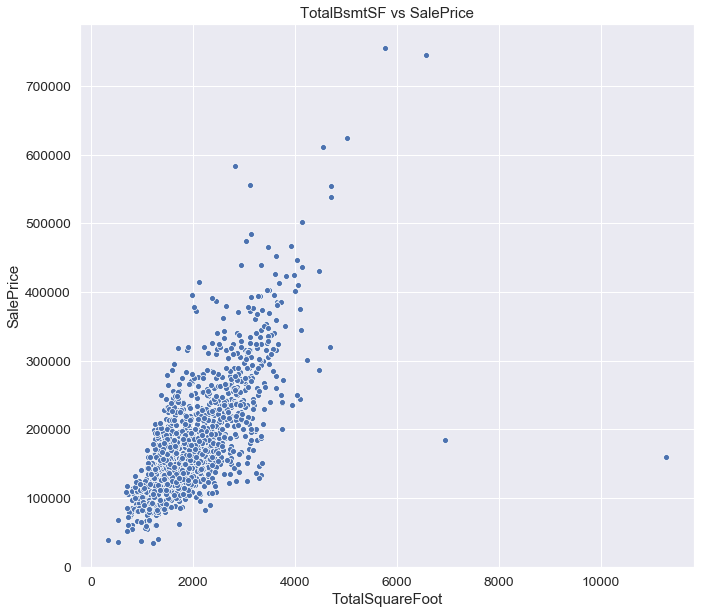

In [159]:
'''Plot between TotalSquareFoot and SalePrice'''
feature_dataframe_this = pd.DataFrame(training_dataframe_converted[selected_features])
plt.subplots(figsize=(11, 10))
plt.title("TotalBsmtSF vs SalePrice")
sns.scatterplot(x=feature_dataframe_this.TotalSquareFoot, y=feature_dataframe_this.SalePrice, data=feature_dataframe_this)

<font color='Red' size='3'>The outliers for this scatter plot (TotalSquareFoot > 5000) must be removed to have a better graphical representation. </font>

After removing outliers, dimensions of the dataframe -  (1455, 15)


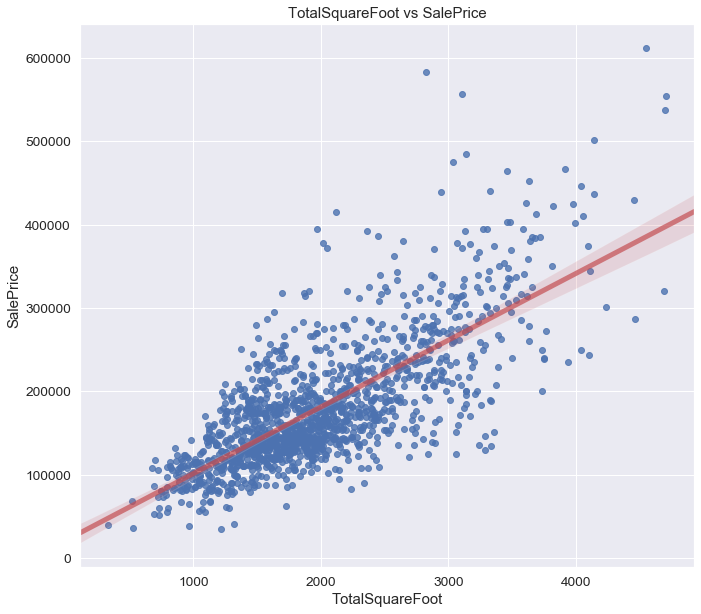

In [160]:
'''Dropping rows with TotalSquareFoot greater than 5000'''
feature_dataframe_this = pd.DataFrame(training_dataframe_converted[selected_features])

'''Making changes to the base dataframe used everywhere in this analysis'''
feature_dataframe = feature_dataframe[feature_dataframe.TotalSquareFoot<5000]
# feature_dataframe_test = feature_dataframe_test[feature_dataframe_test.TotalSquareFoot<5000]
feature_dataframe_this.drop(feature_dataframe_this[feature_dataframe_this.TotalSquareFoot>5000].index, inplace = True)
print("After removing outliers, dimensions of the dataframe - ", feature_dataframe_this.shape)


'''Plot between TotalSquareFoot and SalePrice'''
plt.subplots(figsize=(11, 10))
plt.title("TotalSquareFoot vs SalePrice")
sns.regplot(x=feature_dataframe_this.TotalSquareFoot, y=feature_dataframe_this.SalePrice,ci=99, line_kws={"color":"r","alpha":0.7,"lw":5}, data = feature_dataframe_this)

What interesting properties does Plot 1 reveal?

<font color='Blue' size='3'>The scatter plot shows a near linear relationship between TotalSquareFoot and SalePrice. <br>This means that the Total Basement Area is a definitive factor which governs the Sale Price of the house.</font>

<font color='Black' size='4'>b) Interesting Plot 2</font>

In [161]:
'''Unique values for OverallQual'''
feature_dataframe_this = pd.DataFrame(training_dataframe_converted[selected_features])
print("Unique values for OverallQual feature - ",np.sort(feature_dataframe_this['OverallQual'].unique()))

Unique values for OverallQual feature -  [ 1  2  3  4  5  6  7  8  9 10]


Since, the number of unique values for OverallQual feature is less, we can analyse SalePrice at each value of OverallQual.

[Text(0, 0.5, 'Log of SalePrice')]

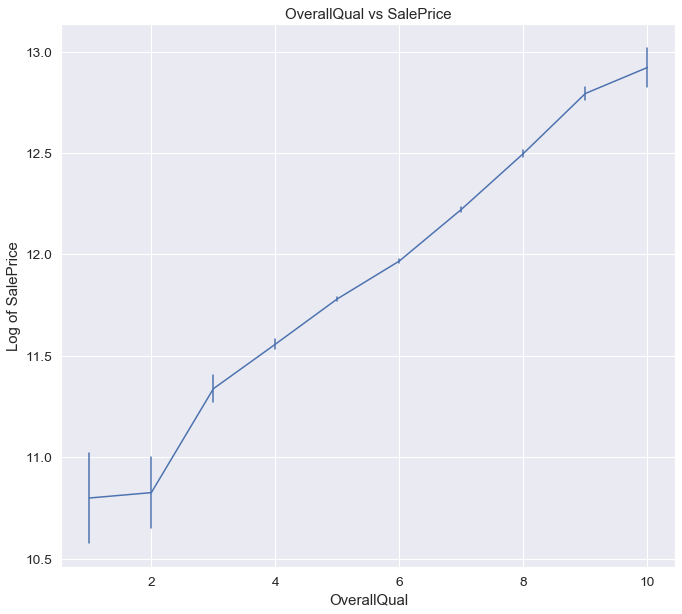

In [162]:
'''Line chart between OverallQual and SalePrice'''

plt.subplots(figsize=(11, 10))
plt.title('OverallQual vs SalePrice')


'''Drawing a line plot between OverallQual and log values for SalePrice'''

ax = sns.lineplot(x=feature_dataframe_this.OverallQual, y=np.log(feature_dataframe_this.SalePrice), err_style="bars", ci=68, data=feature_dataframe_this)
ax.set(ylabel="Log of SalePrice")

What interesting properties does Plot 2 reveal?

<font color='Blue' size='3'>There is a strict non-decreasing relationship between OverallQual and SalePrice.<br>
This means that the buyers are attracted more towards a house that has a higher overall quality rating which in turn increases the over all value of the house and hence, the Sale Price is higher.</font>

<font color='Black' size='4'>c) Interesting Plot 3</font>

In [163]:
'''Unique values for TotalBathrooms'''
feature_dataframe_this = pd.DataFrame(training_dataframe_converted[selected_features])
print("Unique values for TotalBathrooms feature - ",np.sort(feature_dataframe_this.TotalBathrooms.unique()))

Unique values for TotalBathrooms feature -  [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  6. ]


[Text(0, 0.5, 'SalePrice')]

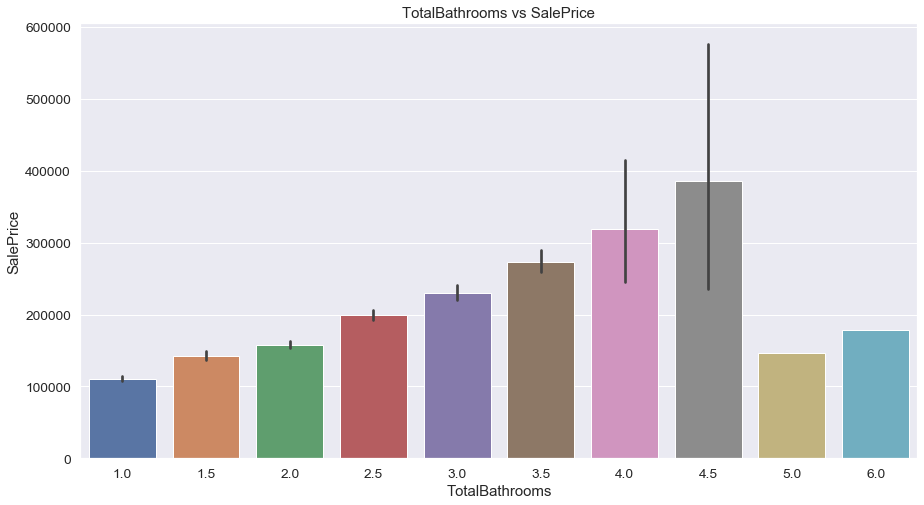

In [164]:
'''Barplot between TotalBathrooms and SalePrice'''
plt.subplots(figsize=(15, 8))
plt.title("TotalBathrooms vs SalePrice")
ax = sns.barplot(x=feature_dataframe_this.TotalBathrooms,y=feature_dataframe_this.SalePrice,data=feature_dataframe_this)
ax.set(ylabel='SalePrice')

What interesting properties does Plot 3 reveal?

<font color='Blue' size='3'>The bar plot between TotalBathrooms and SalePrice shows that higher values of Sale Price are concentrated for higher number of full bathrooms above grade. This shows a higher correlation between TotalBathrooms and SalePrice.</font>

<font color='Black' size='4'>d) Interesting Plot 4</font>

[Text(0, 0.5, 'SalePrice'), Text(0.5, 1.0, 'SalePrice vs YearBuilt')]

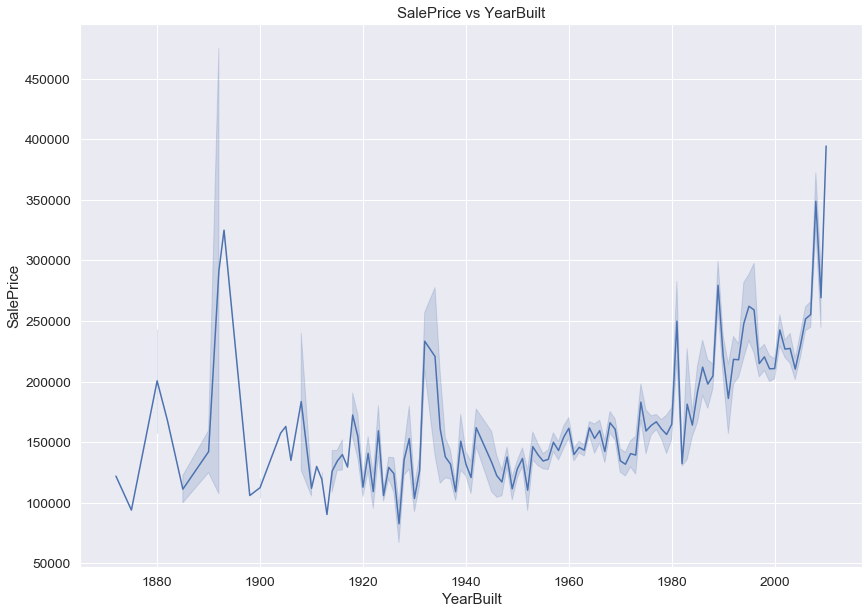

In [165]:
'''Lineplot between SalePrice and YearBuilt'''

feature_dataframe_this = pd.DataFrame(training_dataframe_converted[selected_features])
plt.subplots(figsize=(14, 10))
ax = sns.lineplot(x=feature_dataframe_this.YearBuilt, y=feature_dataframe_this.SalePrice, ci=68, data=feature_dataframe_this)
ax.set(ylabel="SalePrice",title="SalePrice vs YearBuilt")


<font color='Black' size='3'>Handling Outliers for YearBuilt</font>

After removing outliers, dimensions of the dataframe -  (1440, 15)  from -  (1460, 15)


[Text(0, 0.5, 'SalePrice'), Text(0.5, 1.0, 'SalePrice vs YearBuilt')]

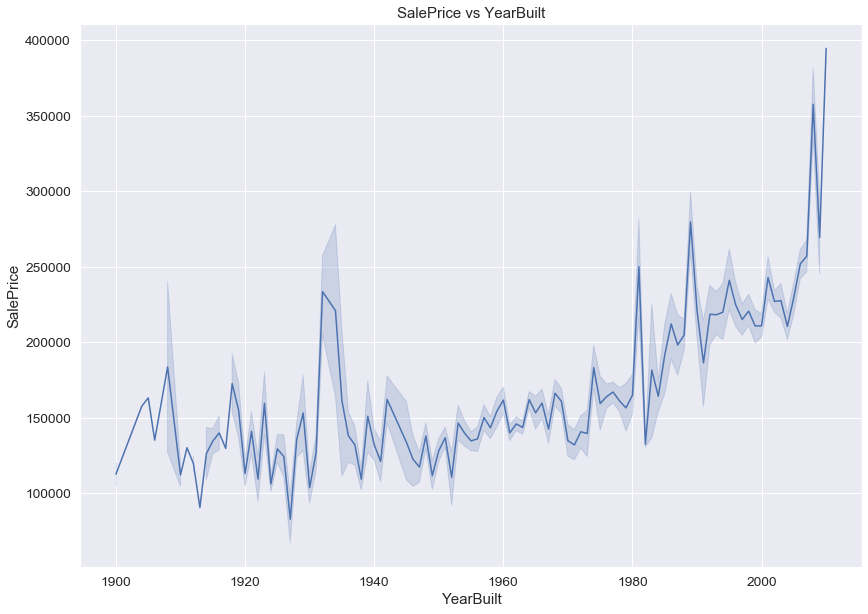

In [166]:
'''Making changes to the base dataframe used everywhere in this analysis'''

feature_dataframe_this1 = pd.DataFrame(training_dataframe_converted[selected_features])
feature_dataframe_this = feature_dataframe.copy()
feature_dataframe = feature_dataframe[feature_dataframe.YearBuilt>1900]
# feature_dataframe_test = feature_dataframe_test[feature_dataframe_test.YearBuilt>1900]
feature_dataframe_this.drop(feature_dataframe_this[feature_dataframe_this.YearBuilt<1900].index, inplace = True)
print("After removing outliers, dimensions of the dataframe - ", feature_dataframe_this.shape, " from - ",feature_dataframe_this1.shape)


plt.subplots(figsize=(14, 10))
ax = sns.lineplot(x=feature_dataframe_this.YearBuilt, y=feature_dataframe_this.SalePrice, ci=68, data=feature_dataframe_this)
ax.set(ylabel="SalePrice",title="SalePrice vs YearBuilt")



What interesting properties does Plot 4 reveal?

<font color='Blue' size='3'>This line plot shows a linear dependency of SalePrice on the YearBuilt feature. This means that the older the house, the lower the sale price for that house. </font>

<font color='Black' size='4'>e) Interesting Plot 5</font>

In [167]:
'''Percentage of rows for GrLivArea > 3000'''
feature_dataframe_this = pd.DataFrame(training_dataframe_converted[selected_features])
percentage = len(feature_dataframe_this[feature_dataframe_this['GrLivArea']>3000])/len(feature_dataframe_this) * 100
print(percentage,"%")

1.2328767123287672 %


(1430, 15)


[Text(0, 0.5, 'SalePrice')]

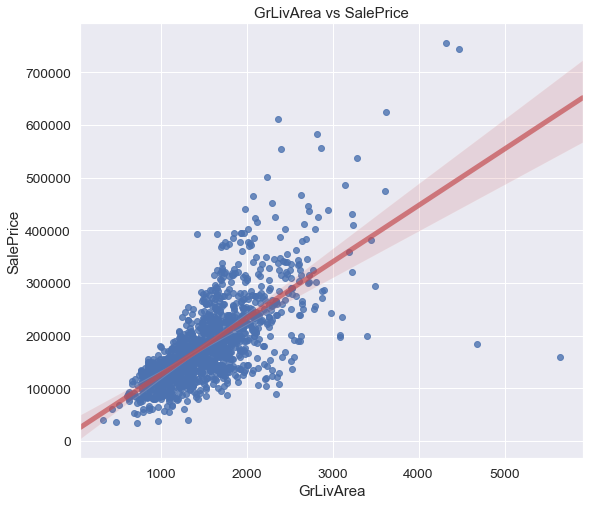

In [168]:
feature_dataframe_this = pd.DataFrame(training_dataframe_converted[selected_features])
print(feature_dataframe.shape)
plt.subplots(figsize=(9, 8))
plt.title("GrLivArea vs SalePrice")
ax = sns.regplot(x=feature_dataframe_this.GrLivArea, y=feature_dataframe_this.SalePrice,ci=99, line_kws={"color":"r","alpha":0.7,"lw":5}, data = feature_dataframe_this)
ax.set(ylabel='SalePrice')

<font color='Red' size='3'>The outliers for this scatter plot (GrLivArea > 3000) must be removed to have a better graphical representation since GrLivArea rows >3000 constitute for 1.23% of the entire dataset.  </font>

<font color='Black' size='3'>Handling Outliers for YearBuilt</font>

After removing outliers, dimensions of the dataframe -  (1442, 15)  from -  (1430, 15)


[Text(0, 0.5, 'SalePrice')]

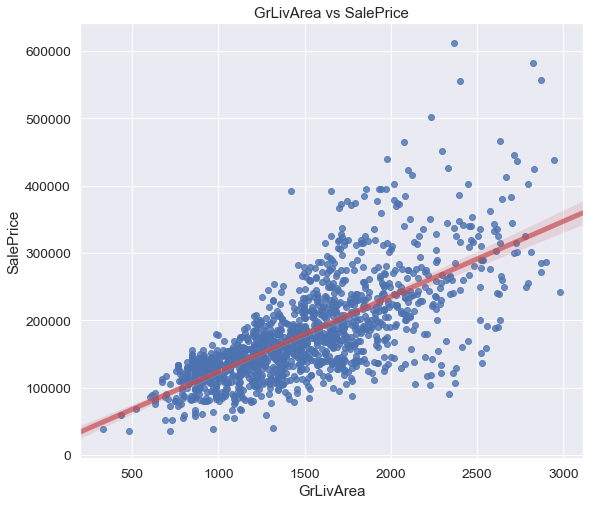

In [170]:
feature_dataframe_this = pd.DataFrame(training_dataframe_converted[selected_features])
plt.subplots(figsize=(9, 8))
plt.title("GrLivArea vs SalePrice")

feature_dataframe_this = feature_dataframe_this[feature_dataframe_this.GrLivArea <3000]
print("After removing outliers, dimensions of the dataframe - ", feature_dataframe_this.shape, " from - ",feature_dataframe.shape)

feature_dataframe = feature_dataframe[feature_dataframe.GrLivArea<3000]
# feature_dataframe_test = feature_dataframe_test[feature_dataframe_test.GrLivArea<3000]
ax = sns.regplot(x=feature_dataframe_this.GrLivArea, y=feature_dataframe_this.SalePrice,ci=99, line_kws={"color":"r","alpha":0.7,"lw":5}, data = feature_dataframe_this)
ax.set(ylabel='SalePrice')

What interesting properties does Plot 5 reveal?

<font color='Blue' size='3'>This scatter plot shows a linear dependency of SalePrice on the GrLivArea feature. This means that the greater the Above grade (ground) living area square feet, the higher the sale price for that house. </font>

## Part 3 - Handcrafted Scoring Function

<font color='Black' size='4'>a) Scoring Strategy</font>

<font color='Blue' size='3'>Evaluating the score for each house needs proper selection of features on which the score evaluation function could work upon.<br> To calculate the score, the following strategy is applied - <br><br> 1) Features which have positive correlation with the SalePrice will contribute to the score positively<br>2) Features which have negative correlation with the SalePrice will inhibit the growth of score value <br>3) Correlation coefficient can be used as weights to the feature value<br>4) The data must be normalised - here, we will use the MinMaxScaler to normalise the data </font>

In [171]:
'''Normalising the selected features dataframe using MinMaxScaler'''
feature_dataframe_this = feature_dataframe.copy()
x = feature_dataframe_this.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
feature_dataframe_this_normalised = pd.DataFrame(x_scaled, columns = feature_dataframe_this.columns)

print("Normalised dataset head\n")
feature_dataframe_this_normalised.head()

Normalised dataset head



,SalePrice,OverallQual,TotalSurface,GrLivArea,TotalSquareFoot,ExterQual,KitchenQual,GarageCars,TotalBathrooms,TotRmsAbvGrd,YearBuilt,KitchenAbvGr,MSSubClass,OverallCond,YrSold
0,0.300993,0.666667,0.432391,0.520424,0.475995,0.666667,0.666667,0.50,0.5,0.6,0.933962,0.333333,0.235294,0.500,0.50
1,0.254180,0.555556,0.424254,0.350983,0.435757,0.333333,0.333333,0.50,0.3,0.4,0.679245,0.333333,0.000000,0.875,0.25
2,0.327001,0.666667,0.459512,0.549168,0.443073,0.666667,0.666667,0.50,0.5,0.4,0.915094,0.333333,0.235294,0.500,0.50
3,0.182226,0.666667,0.414374,0.523071,0.365569,0.333333,0.666667,0.75,0.2,0.5,0.103774,0.333333,0.294118,0.500,0.00
4,0.372947,0.777778,0.582914,0.704992,0.575903,0.666667,0.666667,0.75,0.5,0.7,0.905660,0.333333,0.235294,0.500,0.50


---
<font color='Black' size='4'>b) Features Selected </font>

<font color='Black' size='3'>Positively correlated features which can have major impact</font>

In [172]:
feature_dataframe_this_normalised

,SalePrice,OverallQual,TotalSurface,GrLivArea,TotalSquareFoot,ExterQual,KitchenQual,GarageCars,TotalBathrooms,TotRmsAbvGrd,YearBuilt,KitchenAbvGr,MSSubClass,OverallCond,YrSold
0,0.300993,0.666667,0.432391,0.520424,0.475995,0.666667,0.666667,0.50,0.5,0.6,0.933962,0.333333,0.235294,0.500,0.50
1,0.254180,0.555556,0.424254,0.350983,0.435757,0.333333,0.333333,0.50,0.3,0.4,0.679245,0.333333,0.000000,0.875,0.25
2,0.327001,0.666667,0.459512,0.549168,0.443073,0.666667,0.666667,0.50,0.5,0.4,0.915094,0.333333,0.235294,0.500,0.50
3,0.182226,0.666667,0.414374,0.523071,0.365569,0.333333,0.666667,0.75,0.2,0.5,0.103774,0.333333,0.294118,0.500,0.00
4,0.372947,0.777778,0.582914,0.704992,0.575903,0.666667,0.666667,0.75,0.5,0.7,0.905660,0.333333,0.235294,0.500,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,0.242910,0.555556,0.438977,0.496596,0.300183,0.333333,0.333333,0.50,0.3,0.5,0.896226,0.333333,0.235294,0.500,0.25
1415,0.303594,0.555556,0.635606,0.657716,0.615455,0.333333,0.333333,0.50,0.4,0.5,0.698113,0.333333,0.000000,0.625,1.00
1416,0.401556,0.666667,0.611778,0.758699,0.521491,1.000000,0.666667,0.25,0.2,0.7,0.349057,0.333333,0.294118,1.000,1.00
1417,0.185910,0.444444,0.352964,0.281392,0.416552,0.333333,0.666667,0.25,0.2,0.3,0.433962,0.333333,0.000000,0.625,1.00


In [173]:
positiveCorrFeatures = top15CorrelatedFeatures.iloc[0:11]
print("Positively correlated features selected\n")
positiveCorrFeatures

Positively correlated features selected



SalePrice          1.000000
OverallQual        0.790982
TotalSurface       0.782260
GrLivArea          0.708624
TotalSquareFoot    0.708047
ExterQual          0.682639
KitchenQual        0.659600
GarageCars         0.640409
TotalBathrooms     0.631731
TotRmsAbvGrd       0.533723
YearBuilt          0.522897
Name: SalePrice, dtype: float64

<font color='Black' size='3'>Negatively correlated features which can have major impact</font>

In [174]:
negativeCorrFeatures = top10NegativelyCorrelatedFeatures.iloc[0:4]
print("Negatively correlated features selected\n")
negativeCorrFeatures

Negatively correlated features selected



KitchenAbvGr   -0.135907
MSSubClass     -0.084284
OverallCond    -0.077856
YrSold         -0.028923
Name: SalePrice, dtype: float64

In [175]:
'''Creating a dataframe with the desirability score'''
feature_dataframe_scored = feature_dataframe.copy()
scoringFeatures = ['OverallQual','GrLivArea','ExterQual','KitchenQual','GarageCars','TotalSurface','TotalBathrooms','TotRmsAbvGrd','YearBuilt'];
import math

'''Function to calculate the desirability score'''
def calculate_score(row):
    rowScore = 0
    for col in scoringFeatures:
          rowScore += row[col] 
    return rowScore


feature_dataframe_scored['Score'] = feature_dataframe_this_normalised.apply(calculate_score, axis=1)

In [176]:
top10MostDesirableHouses = feature_dataframe_scored.loc[feature_dataframe_scored['Score'].sort_values(ascending=False).head(10).index]
top10LeastDesirableHouses = feature_dataframe_scored.loc[feature_dataframe_scored['Score'].sort_values(ascending=True).head(10).index]

In [177]:
feature_dataframe_this = feature_dataframe_this_normalised.copy()
x = feature_dataframe_this.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
feature_dataframe_this_normalised = pd.DataFrame(x_scaled, columns = feature_dataframe_this.columns)

print("Normalised dataset head\n")
feature_dataframe_this_normalised.head()

Normalised dataset head



,SalePrice,OverallQual,TotalSurface,GrLivArea,TotalSquareFoot,ExterQual,KitchenQual,GarageCars,TotalBathrooms,TotRmsAbvGrd,YearBuilt,KitchenAbvGr,MSSubClass,OverallCond,YrSold
0,0.300993,0.666667,0.432391,0.520424,0.475995,0.666667,0.666667,0.50,0.5,0.6,0.933962,0.333333,0.235294,0.500,0.50
1,0.254180,0.555556,0.424254,0.350983,0.435757,0.333333,0.333333,0.50,0.3,0.4,0.679245,0.333333,0.000000,0.875,0.25
2,0.327001,0.666667,0.459512,0.549168,0.443073,0.666667,0.666667,0.50,0.5,0.4,0.915094,0.333333,0.235294,0.500,0.50
3,0.182226,0.666667,0.414374,0.523071,0.365569,0.333333,0.666667,0.75,0.2,0.5,0.103774,0.333333,0.294118,0.500,0.00
4,0.372947,0.777778,0.582914,0.704992,0.575903,0.666667,0.666667,0.75,0.5,0.7,0.905660,0.333333,0.235294,0.500,0.50


In [178]:
top10MostDesirableHouses

,SalePrice,OverallQual,TotalSurface,GrLivArea,TotalSquareFoot,ExterQual,KitchenQual,GarageCars,TotalBathrooms,TotRmsAbvGrd,YearBuilt,KitchenAbvGr,MSSubClass,OverallCond,YrSold,Score
780,176000,7,2490,1253,1253,3,3,2,2.0,6,1995,1,20,5,2007,7.878919
433,181000,6,2530,1604,1604,3,3,2,2.5,7,1997,1,60,5,2008,7.713280
516,158000,6,2808,2119,2119,3,3,2,2.5,7,1972,1,80,6,2009,7.661948
874,66500,5,1807,1131,1131,3,3,1,1.5,5,1941,1,50,6,2009,7.641865
343,266000,9,3368,1684,1712,5,5,2,2.0,6,2005,1,120,5,2008,7.618940
1333,125500,5,2163,1360,1360,3,4,1,1.5,6,1938,1,50,6,2006,7.590054
1018,160000,7,1856,1472,1472,4,4,2,2.5,7,1991,1,80,5,2007,7.493574
579,131500,5,2845,1795,1795,3,3,1,2.0,7,1954,1,50,5,2008,7.486866
11,345000,9,3499,2324,3322,5,5,3,4.0,11,2005,1,60,5,2006,7.457501
58,438780,10,4355,2945,2945,5,4,3,3.5,10,2006,1,60,5,2006,7.445411


<font color='Blue' size='3'>The ten most desirable houses

In [179]:
top10LeastDesirableHouses

,SalePrice,OverallQual,TotalSurface,GrLivArea,TotalSquareFoot,ExterQual,KitchenQual,GarageCars,TotalBathrooms,TotRmsAbvGrd,YearBuilt,KitchenAbvGr,MSSubClass,OverallCond,YrSold,Score
522,159000,6,2668,1664,2063,3,3,2,2.0,7,1947,1,50,7,2006,0.396226
369,162000,5,2350,1287,1617,3,4,2,2.0,7,1959,1,20,7,2010,0.928129
621,240000,6,4136,2614,3752,3,3,2,2.5,9,1974,1,60,7,2008,0.930664
1071,154000,6,2283,1556,1854,3,3,2,1.5,8,1968,1,60,6,2009,1.061049
1285,132500,6,2192,1412,1412,3,3,1,1.0,6,1939,1,50,6,2009,1.268225
950,129000,5,1728,864,1411,3,4,2,2.0,5,1950,1,20,8,2007,1.437137
88,85000,3,2026,1526,1013,2,2,0,1.0,6,1915,1,50,2,2009,1.504608
29,68500,4,1040,520,520,3,2,1,1.0,4,1927,1,30,6,2008,1.540764
1299,154000,5,2492,1246,2492,3,4,1,2.5,6,1959,1,20,7,2010,1.555299
487,175000,5,2968,1484,2482,3,3,2,2.0,7,1971,1,20,6,2007,1.711192


<font color='Blue' size='3'>The ten least desirable houses

In [180]:
'''Marking most and least desirable housed in the scored dataset'''
feature_dataframe_scored_this = feature_dataframe_scored.copy()
feature_dataframe_scored_this.loc[(feature_dataframe_scored_this['Score']>=top10MostDesirableHouses['Score'].min()), 'Desirable'] = "Most"
feature_dataframe_scored_this.loc[(feature_dataframe_scored_this['Score']<=top10LeastDesirableHouses['Score'].max()), 'Desirable'] = "Least"
rowsToDrop = feature_dataframe_scored_this.loc[(feature_dataframe_scored_this['Score']<top10MostDesirableHouses['Score'].min()) & (feature_dataframe_scored_this['Score']>top10LeastDesirableHouses['Score'].max())].index
feature_dataframe_scored_this.drop(rowsToDrop, inplace=True)
rowsToDrop = feature_dataframe_scored_this.loc[feature_dataframe_scored_this['Desirable'].isna()].index
feature_dataframe_scored_this.drop(rowsToDrop, inplace=True)


In [181]:
# pairplot_dataframe = feature_dataframe_scored_this.copy()
# pairplot_dataframe = pairplot_dataframe[pairplot_dataframe['SalePrice']<300000]
# plot = sns.pairplot(data=pairplot_dataframe,
#                   y_vars=['SalePrice'],
#                   x_vars=pairplot_dataframe.columns, hue='Desirable')
# plot.fig.set_size_inches(10,5)

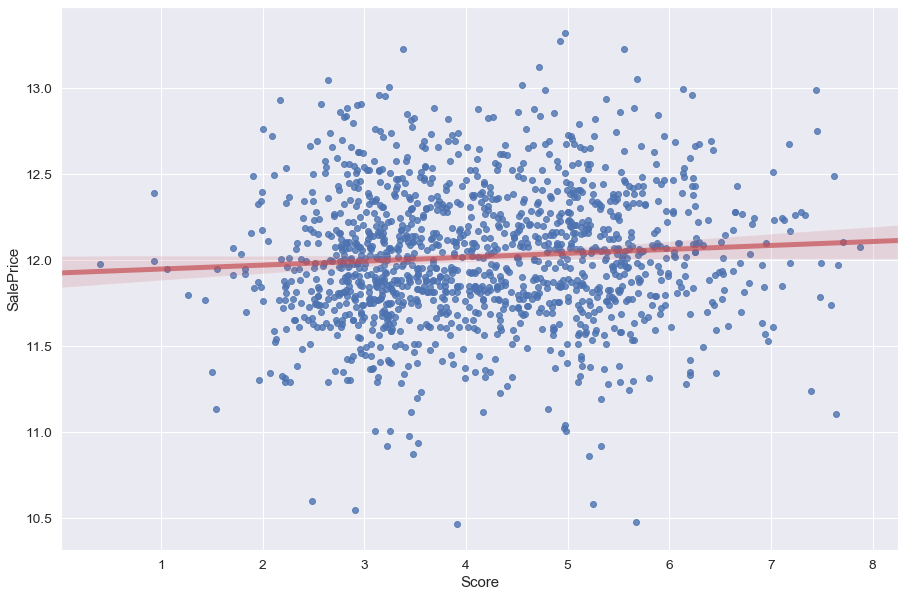

In [182]:

plt.figure(figsize= (15,10))  
sns.regplot(x=feature_dataframe_scored.Score, y=np.log(feature_dataframe_scored.SalePrice),ci=99, line_kws={"color":"r","alpha":0.7,"lw":5}, data = feature_dataframe_this)


<font color='Blue' size='3'>The Scatter plot shows the relationship between the Score and the Sale Price. <br> The score and sale price are linearly related to each other. Higher the score, higher is the sale price.</font>

## Part 4 - Pairwise Distance Function

In [183]:
matrix = np.array(feature_dataframe_this_normalised.copy())

def calculate_distance(row1,row2):
    distance = 0
    for i in range(0,len(row1)):
        distance+=pow(abs(row1[i] - row2[i]),2)
    return math.sqrt(distance)

length = len(matrix)
newMatrixDistance =  [[0 for x in range(length)] for y in range(length)] 
for i in range(0,length):
    house1 = matrix[i]
    for j in range(0,length):
        house2 = matrix[j]
        newMatrixDistance[i][j] = calculate_distance(house1,house2)
distanceMatrix = pd.DataFrame(newMatrixDistance)

In [184]:
distanceMatrix

,0,1,2,3,4,5,6,7,8,9,...,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418
0,0.000000,0.818855,0.208993,1.114861,0.396899,0.719967,0.475655,0.665543,0.964277,1.301481,...,0.921347,0.690401,1.156476,1.139579,0.486420,0.619182,0.843079,1.104683,1.026745,0.737130
1,0.818855,0.000000,0.796591,0.930897,0.978825,0.694162,0.799344,0.758819,0.803948,1.217664,...,1.020732,1.120116,1.120801,0.855257,0.851401,0.541291,0.904900,1.317013,0.951880,0.571120
2,0.208993,0.796591,0.000000,1.102269,0.473497,0.671851,0.472157,0.655992,0.970684,1.270653,...,0.936117,0.677593,1.131096,1.127280,0.450418,0.614897,0.834082,1.120833,0.989513,0.713336
3,1.114861,0.930897,1.102269,0.000000,1.136686,1.189093,1.123146,1.119104,0.765403,1.201236,...,1.331871,1.320974,1.222573,1.299098,1.274231,0.948242,1.351137,1.487116,1.270956,1.075694
4,0.396899,0.978825,0.473497,1.136686,0.000000,0.939871,0.529384,0.700652,1.039030,1.487911,...,1.148189,0.714245,1.342375,1.408064,0.742896,0.796098,0.871524,1.133235,1.248359,0.989223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,0.619182,0.541291,0.614897,0.948242,0.796098,0.584365,0.720780,0.717270,0.794237,1.135890,...,0.859763,1.019855,0.844084,0.750493,0.767702,0.000000,0.922192,1.403018,1.074074,0.696089
1415,0.843079,0.904900,0.834082,1.351137,0.871524,0.634441,0.980240,0.386573,0.900273,1.404102,...,0.878724,1.017964,1.570887,1.393707,0.801203,0.922192,0.000000,1.043342,0.781441,0.803719
1416,1.104683,1.317013,1.120833,1.487116,1.133235,1.291541,1.262454,1.038402,1.192819,1.469879,...,1.185591,1.211610,1.821687,1.727534,1.160571,1.403018,1.043342,0.000000,1.113772,1.072234
1417,1.026745,0.951880,0.989513,1.270956,1.248359,0.684967,1.198997,0.866459,0.917913,1.219733,...,0.896797,1.074433,1.539545,1.258333,0.797853,1.074074,0.781441,1.113772,0.000000,0.723984


How well does the distance function work? When does it do well/badly?

<font color='Blue' size='4'>The distance function is based on the root square sum distance between two houses on given features.<br>If different feature values are considered as metrics and we try to compare the nearness of houses in pair, then calculating the Eucledean distance between them becomes a valid metric.<br><br>It did well when the data was NORMALIZED. If data is not normalized, there is very little chance of finding the distance between features since there is no common scale of measurement. It will also fail to work when the distance between two features is SAME but one of the feature falls outside the boundary of the model. In such a case the Mahanalobis distance method is a better bet.</font>

## Part 5 - Clustering

Shape of the Centroid Matrix: (8, 2)


Text(0.5, 1.0, 'kmeans Clustering Visual Plot, red indicates the cluster centre')

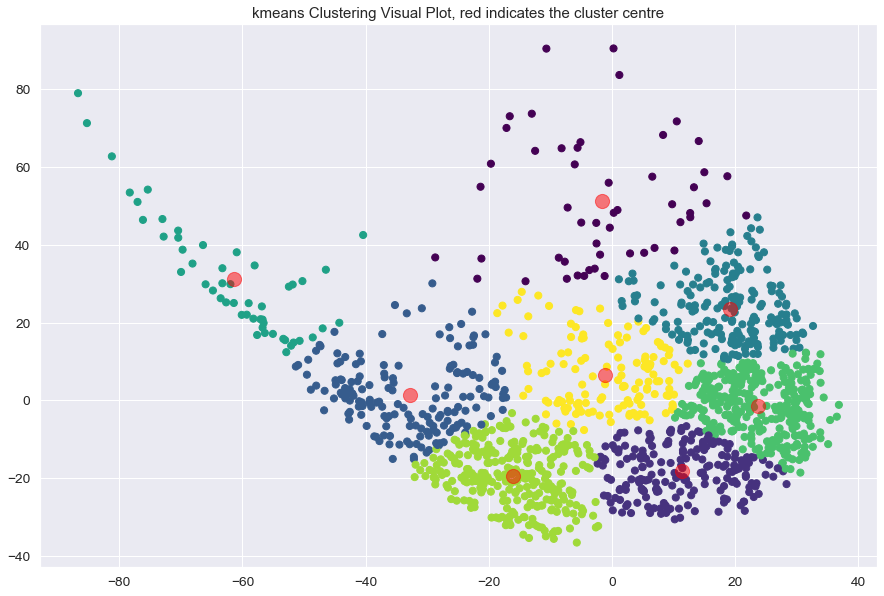

In [185]:
# TODO: code for clustering and visualization
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.figure(figsize= (15,10))  
dist_mat = distanceMatrix.copy()
sc = StandardScaler()
dist_mat_std = pd.DataFrame(sc.fit_transform(dist_mat))
cov_mat = np.cov(dist_mat_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

dist_mat_pca = pd.DataFrame(dist_mat_std.dot(w))
n_clust=8
house_clust = KMeans(n_clusters=n_clust,n_init=4,max_iter=100,n_jobs=4)
house_clust.fit(dist_mat_pca)
print ('\033[1m' + 'Shape of the Centroid Matrix: ' + str(house_clust.cluster_centers_.shape))


pred_kmeans = house_clust.predict(dist_mat_pca)


plt.scatter(dist_mat_pca[0], dist_mat_pca[1], c=pred_kmeans, s=50, cmap='viridis')
centers = house_clust.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('kmeans Clustering Visual Plot, red indicates the cluster centre',size= 15)

How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.

<font color='Blue' size='4'>The Visual plot shows 8 clusters and within those clusters, the cluster mean. The clusters are indicative of the fact that houses which share similar properties are similar in terms of their features. <br>There are marked boundaries between different clusters which shows the demarkation of different cluster types. </font>

## Part 6 - Linear Regression

<font color='Green' size='4'> Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.</font>

<font color='Green' size='4'>We are using Linear Regression to predict the Sale Price (dependent feature) with other features like 'OverallQual', 'TotalSurface', 'GrLivArea', 'TotalSquareFoot', 'ExterQual', 'KitchenQual', 'GarageCars', 'TotalBathrooms', 'TotRmsAbvGrd', 'YearBuilt', 'KitchenAbvGr', 'MSSubClass', 'OverallCond', 'YrSold'</font>

In [186]:
'''Linear Regression'''
feature_dataframe_LR = feature_dataframe.copy()
feature_dataframe_LR = feature_dataframe_LR.loc[:, feature_dataframe_LR.columns != 'SalePrice'] 

# Target feature is SalePrice
target = np.log(feature_dataframe.iloc[:, 0].values.reshape(-1, 1)) 
# Dividing the training data into 30% test and 70% train data
X_train, X_test, y_train, y_test = train_test_split(feature_dataframe_LR, target, test_size=0.3,random_state=42)


linear_regressor = LinearRegression()  
mdl = linear_regressor.fit(X_train, y_train)  
m = mdl.coef_[0]
b = mdl.intercept_

# Y_pred is the predicted SalePrice values for the 30% test data
Y_pred = linear_regressor.predict(X_test) 
RMSLE=np.sqrt(metrics.mean_squared_error(Y_pred,y_test))

print("Root Mean Square Error on log of Sale Price - ",RMSLE)

Root Mean Square Error on log of Sale Price -  0.13333229489583898


In [187]:
'''Testing on test data'''

# Imputing the test data
impute_zero(feature_dataframe_test,feature_dataframe_test.columns)
Y_test_data = linear_regressor.predict(feature_dataframe_test) 
Y_test_data = np.exp(Y_test_data)

In [188]:
# Saving the result 
ids = np.array(test_dataframe.Id)
Y_test_data = Y_test_data.ravel()
data = {'Id':ids, 'SalePrice':Y_test_data}   
result_df = pd.DataFrame(data) 

result_df.to_csv('result2.csv', index=False)

---
<font color='Black' size='5'>How well/badly does it work? Which are the most important variables?</font>

<font color='Blue' size='4'> The Linear Regression model applied on this dataset produces the Root Mean Square Log Error as 0.13333229489583898.  This is a fairly good predictor based on the small value of the Root Mean Square Log Error value.<br> The most important variables are   'OverallQual', 'TotalSurface', 'GrLivArea', 'TotalSquareFoot' and 'ExterQual' as they have a great degree of impact on the final prediction.</font>

## Part 7 - External Dataset

In [189]:
'''Importing new data sets'''
feature_dataframe_this_external = feature_dataframe.copy()

'''Dataset which contains Year and the HousePriceIndex'''
new_dataset1 = pd.read_csv("ATNHPIUS11180Q.csv")

'''Dataset which contains Year and the GDP'''
new_dataset2 = pd.read_csv("PCRGMP11180.csv")

'''Dataset which contains Year and the Per Capita Personal Income'''
new_dataset3 = pd.read_csv("AMES119PCPI.csv")

new_dataset1.rename(columns={'ATNHPIUS11180Q': 'HouseIndex'}, inplace=True)
new_dataset2.rename(columns={'PCRGMP11180': 'GDP'}, inplace=True)
new_dataset3.rename(columns={'AMES119PCPI': 'PerCapitaIncome'}, inplace=True)

dataframe1 = pd.DataFrame(new_dataset1)
dataframe2 = pd.DataFrame(new_dataset2)
dataframe3 = pd.DataFrame(new_dataset3)


dataframe1['YearBuilt'] = pd.to_datetime(dataframe1['DATE']).dt.year
dataframe2['YearBuilt'] = pd.to_datetime(dataframe2['DATE']).dt.year
dataframe3['YearBuilt'] = pd.to_datetime(dataframe3['DATE']).dt.year

dataframe1 = dataframe1.drop('DATE',axis=1)
dataframe2 = dataframe2.drop('DATE',axis=1)
dataframe3 = dataframe3.drop('DATE',axis=1)


feature_dataframe_this_external = pd.merge(feature_dataframe_this_external, dataframe1, on='YearBuilt')
feature_dataframe_this_external = pd.merge(feature_dataframe_this_external, dataframe2, on='YearBuilt')
feature_dataframe_this_external = pd.merge(feature_dataframe_this_external, dataframe3, on='YearBuilt')


In [190]:
feature_dataframe_this_external

,SalePrice,OverallQual,TotalSurface,GrLivArea,TotalSquareFoot,ExterQual,KitchenQual,GarageCars,TotalBathrooms,TotRmsAbvGrd,YearBuilt,KitchenAbvGr,MSSubClass,OverallCond,YrSold,HouseIndex,GDP,PerCapitaIncome
0,208500,7,2566,1710,2416,4,4,2,3.5,8,2003,1,60,5,2008,143.58,39441,28616
1,208500,7,2566,1710,2416,4,4,2,3.5,8,2003,1,60,5,2008,144.32,39441,28616
2,208500,7,2566,1710,2416,4,4,2,3.5,8,2003,1,60,5,2008,147.08,39441,28616
3,208500,7,2566,1710,2416,4,4,2,3.5,8,2003,1,60,5,2008,151.08,39441,28616
4,239686,7,3583,2149,3500,4,4,2,2.5,6,2003,1,50,5,2009,143.58,39441,28616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,287090,8,3151,1578,1578,4,5,3,2.0,7,2008,1,20,5,2009,166.91,45972,36050
1436,394432,9,3712,1856,3301,4,5,3,2.5,8,2010,1,20,2,2010,162.76,41361,32764
1437,394432,9,3712,1856,3301,4,5,3,2.5,8,2010,1,20,2,2010,166.26,41361,32764
1438,394432,9,3712,1856,3301,4,5,3,2.5,8,2010,1,20,2,2010,166.51,41361,32764


Describe the dataset and whether this data helps with prediction.

<font color='Blue' size='4'>
    The dataset1 contains the YEAR as well as the Housing Index values. It can show one areas where home values are increasing or decreasing so one can estimate prices. With proper lender assistance, HPIs can help one decide if it’s a good time to purchase a new home. Hence, Housing Price determines the Sale Price of a house in a highly correlated manner. <br><br> The dataset2 is the data that takes the YEAR as well as the GDP. One of the important factors in deciding the sale price of the house is the GDP that the nation accounts for in the contemporary year. The GDP when included in our dataset gives a new dimension to our understanding. GDP indicates the monetary value of manufacturing a product or service by the nation in a specific period. This monetary cost has a direct impact on the Sale Price of the house. <br><br>
    The dataset3 is the data that takes the YEAR as well as the Per Capita Personal Income. Per Capita personal income is the income of the citizens of a nation. The amount of money one person can spend gives a general indication of the buying power of the citizens and hence, the Sale Price might have to be adjusted in that manner. 
    </font>

In [191]:
'''Linear Regression run on the merged dataset'''
feature_dataframe_LR = feature_dataframe_this_external.copy()
feature_dataframe_LR = feature_dataframe_LR.loc[:, feature_dataframe_LR.columns != 'SalePrice'] 

# Target feature is SalePrice
target = np.log(feature_dataframe_this_external.iloc[:, 0].values.reshape(-1, 1)) 
# Dividing the training data into 30% test and 70% train data
X_train, X_test, y_train, y_test = train_test_split(feature_dataframe_LR, target, test_size=0.3,random_state=42)

linear_regressor = LinearRegression()  
mdl = linear_regressor.fit(X_train, y_train)  
m = mdl.coef_[0]
b = mdl.intercept_

# Y_pred is the predicted SalePrice values for the 30% test data
Y_pred = linear_regressor.predict(X_test) 
RMSLE2=np.sqrt(metrics.mean_squared_error(Y_pred,y_test))

print("Root Mean Square Error on log of Sale Price - ",RMSLE2)

Root Mean Square Error on log of Sale Price -  0.10420799855141304


<font color='Blue' size='4'>After running Linear Regression on the merged data, the Root Mean Square Log Error reduced from 0.13333229489583898 to 0.10420799855141304, a 21% reduction in the error. <br><br> This shows that the addition of relevant data to the model increases its accuracy and has a positive effect in prediction.</font>

## Part 8 - Permutation Test

<font color='Blue' size='4'>Defining P-Value<br>
A p-value for a statistical model is the probability that when the null hypothesis is true, the statistical summary is equal to or greater than the actual observed results</font>

In [192]:
# TODO: code for all permutation tests
feature_dataframe.columns

Index(['SalePrice', 'OverallQual', 'TotalSurface', 'GrLivArea',
       'TotalSquareFoot', 'ExterQual', 'KitchenQual', 'GarageCars',
       'TotalBathrooms', 'TotRmsAbvGrd', 'YearBuilt', 'KitchenAbvGr',
       'MSSubClass', 'OverallCond', 'YrSold'],
      dtype='object')

In [193]:
feature_dataframe.iloc[1] 

SalePrice          181500.0
OverallQual             6.0
TotalSurface         2524.0
GrLivArea            1262.0
TotalSquareFoot      2240.0
ExterQual               3.0
KitchenQual             3.0
GarageCars              2.0
TotalBathrooms          2.5
TotRmsAbvGrd            6.0
YearBuilt            1976.0
KitchenAbvGr            1.0
MSSubClass             20.0
OverallCond             8.0
YrSold               2007.0
Name: 1, dtype: float64

In [194]:
'''Function permutation values'''
def permutation_test(data, conditions, nsamples=200):
    differences = np.empty(nsamples, 'd')
    observed = np.mean(data[conditions == 1]) - np.mean(data[conditions == 2])
    c = conditions.copy()
    for i in range(nsamples):
        np.random.shuffle(c)
        differences[i] = np.mean(data[c == 1]) - np.mean(data[c == 2])
    return observed, np.mean(differences >= observed)

In [197]:
'''SalePrice vs OverallQual'''
'''Linear Regression '''

colIndex = feature_dataframe.columns.get_loc('OverallQual')

target = np.log(feature_dataframe_this_external.iloc[:, 0].values.reshape(-1, 1)) 
x = feature_dataframe_this_external.iloc[:, colIndex].values.reshape(-1, 1)

linear_regressor = LinearRegression()  
mdl = linear_regressor.fit(x, target)  
m = mdl.coef_[0]
b = mdl.intercept_

# Y_pred is the predicted SalePrice values for the 30% test data
Y_pred = linear_regressor.predict(x) 

print("P-value for SalePrice vs OverallQual - ")
p = permutation_test( Y_pred,x)
print(p[1])

P-value for SalePrice vs OverallQual - 
0.0


In [198]:
'''SalePrice vs TotalSurface'''
'''Linear Regression '''

colIndex = feature_dataframe.columns.get_loc('TotalSurface')

target = np.log(feature_dataframe_this_external.iloc[:, 0].values.reshape(-1, 1)) 
x = feature_dataframe_this_external.iloc[:, colIndex].values.reshape(-1, 1)

linear_regressor = LinearRegression()  
mdl = linear_regressor.fit(x, target)  
m = mdl.coef_[0]
b = mdl.intercept_

# Y_pred is the predicted SalePrice values for the 30% test data
Y_pred = linear_regressor.predict(x) 

print("P-value for SalePrice vs TotalSurface - ")
p = permutation_test(x, Y_pred)
print(p[1])

P-value for SalePrice vs TotalSurface - 
0.0


In [199]:
'''SalePrice vs GrLivArea'''
'''Linear Regression '''

colIndex = feature_dataframe.columns.get_loc('GrLivArea')

target = np.log(feature_dataframe_this_external.iloc[:, 0].values.reshape(-1, 1)) 
x = feature_dataframe_this_external.iloc[:, colIndex].values.reshape(-1, 1)

linear_regressor = LinearRegression()  
mdl = linear_regressor.fit(x, target)  
m = mdl.coef_[0]
b = mdl.intercept_

# Y_pred is the predicted SalePrice values for the 30% test data
Y_pred = linear_regressor.predict(x) 

print("P-value for SalePrice vs GrLivArea - ")
p = permutation_test(x, Y_pred)
print(p[1])

P-value for SalePrice vs GrLivArea - 
0.0


In [200]:
'''SalePrice vs TotalSquareFoot'''
'''Linear Regression '''

colIndex = feature_dataframe.columns.get_loc('TotalSquareFoot')

target = np.log(feature_dataframe_this_external.iloc[:, 0].values.reshape(-1, 1)) 
x = feature_dataframe_this_external.iloc[:, colIndex].values.reshape(-1, 1)

linear_regressor = LinearRegression()  
mdl = linear_regressor.fit(x, target)  
m = mdl.coef_[0]
b = mdl.intercept_

# Y_pred is the predicted SalePrice values for the 30% test data
Y_pred = linear_regressor.predict(x) 

print("P-value for SalePrice vs TotalSquareFoot - ")
p = permutation_test(x, Y_pred)
print(p[1])

P-value for SalePrice vs TotalSquareFoot - 
0.0


In [201]:

'''SalePrice vs ExterQual'''
'''Linear Regression '''

colIndex = feature_dataframe.columns.get_loc('ExterQual')

target = np.log(feature_dataframe_this_external.iloc[:, 0].values.reshape(-1, 1)) 
x = feature_dataframe_this_external.iloc[:, colIndex].values.reshape(-1, 1)

linear_regressor = LinearRegression()  
mdl = linear_regressor.fit(x, target)  
m = mdl.coef_[0]
b = mdl.intercept_

# Y_pred is the predicted SalePrice values for the 30% test data
Y_pred = linear_regressor.predict(x) 

print("P-value for SalePrice vs ExterQual - ")
p = permutation_test(x, target)
print(p[1])

P-value for SalePrice vs ExterQual - 
0.0


In [202]:

'''SalePrice vs KitchenQual'''
'''Linear Regression '''

colIndex = feature_dataframe.columns.get_loc('KitchenQual')

target = np.log(feature_dataframe_this_external.iloc[:, 0].values.reshape(-1, 1)) 
x = feature_dataframe_this_external.iloc[:, colIndex].values.reshape(-1, 1)

linear_regressor = LinearRegression()  
mdl = linear_regressor.fit(x, target)  
m = mdl.coef_[0]
b = mdl.intercept_

# Y_pred is the predicted SalePrice values for the 30% test data
Y_pred = linear_regressor.predict(x) 

print("P-value for SalePrice vs KitchenQual - ")
p = permutation_test(x, target)
print(p[1])

P-value for SalePrice vs KitchenQual - 
0.0


In [203]:
'''SalePrice vs OverallQual'''
print("P-value for SalePrice vs OverallQual - ")
p = permutation_test(feature_dataframe['SalePrice'].values, feature_dataframe['OverallQual'].values)
print(p[1])

'''SalePrice vs TotalSurface'''
print("P-value for SalePrice vs TotalSurface - ")
p = permutation_test(feature_dataframe['SalePrice'].values, feature_dataframe['TotalSurface'].values)
print(p[1])


'''SalePrice vs GrLivArea'''
print("P-value for SalePrice vs GrLivArea - ")
p = permutation_test(feature_dataframe['SalePrice'].values, feature_dataframe['GrLivArea'].values)
print(p[1])

'''SalePrice vs TotalSquareFoot'''
print("P-value for SalePrice vs TotalSquareFoot - ")
p = permutation_test(feature_dataframe['SalePrice'].values, feature_dataframe['TotalSquareFoot'].values)
print(p[1])

'''SalePrice vs ExterQual'''
print("P-value for SalePrice vs ExterQual - ")
p = permutation_test(feature_dataframe['SalePrice'].values, feature_dataframe['ExterQual'].values)
print(p[1])

'''SalePrice vs KitchenQual'''
print("P-value for SalePrice vs KitchenQual - ")
p = permutation_test(feature_dataframe['SalePrice'].values, feature_dataframe['KitchenQual'].values)
print(p[1])

'''SalePrice vs GarageCars'''
print("P-value for SalePrice vs GarageCars - ")
p = permutation_test(feature_dataframe['SalePrice'].values, feature_dataframe['GarageCars'].values)
print(p[1])

'''SalePrice vs OverallQual'''
print("P-value for SalePrice vs TotRmsAbvGrd - ")
p = permutation_test(feature_dataframe['SalePrice'].values, feature_dataframe['TotRmsAbvGrd'].values)
print(p[1])

'''SalePrice vs OverallQual'''
print("P-value for SalePrice vs YrSold - ")
p = permutation_test(feature_dataframe['SalePrice'].values, feature_dataframe['YrSold'].values)
print(p[1])

P-value for SalePrice vs OverallQual - 
0.495
P-value for SalePrice vs TotalSurface - 
0.0
P-value for SalePrice vs GrLivArea - 
0.0
P-value for SalePrice vs TotalSquareFoot - 
0.0
P-value for SalePrice vs ExterQual - 
0.0
P-value for SalePrice vs KitchenQual - 
0.0
P-value for SalePrice vs GarageCars - 
1.0
P-value for SalePrice vs TotRmsAbvGrd - 
0.0
P-value for SalePrice vs YrSold - 
0.0


Describe the results.

## Part 9 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/vibhor16

Highest Rank: 2319

Score: 0.13625

Number of entries: 1

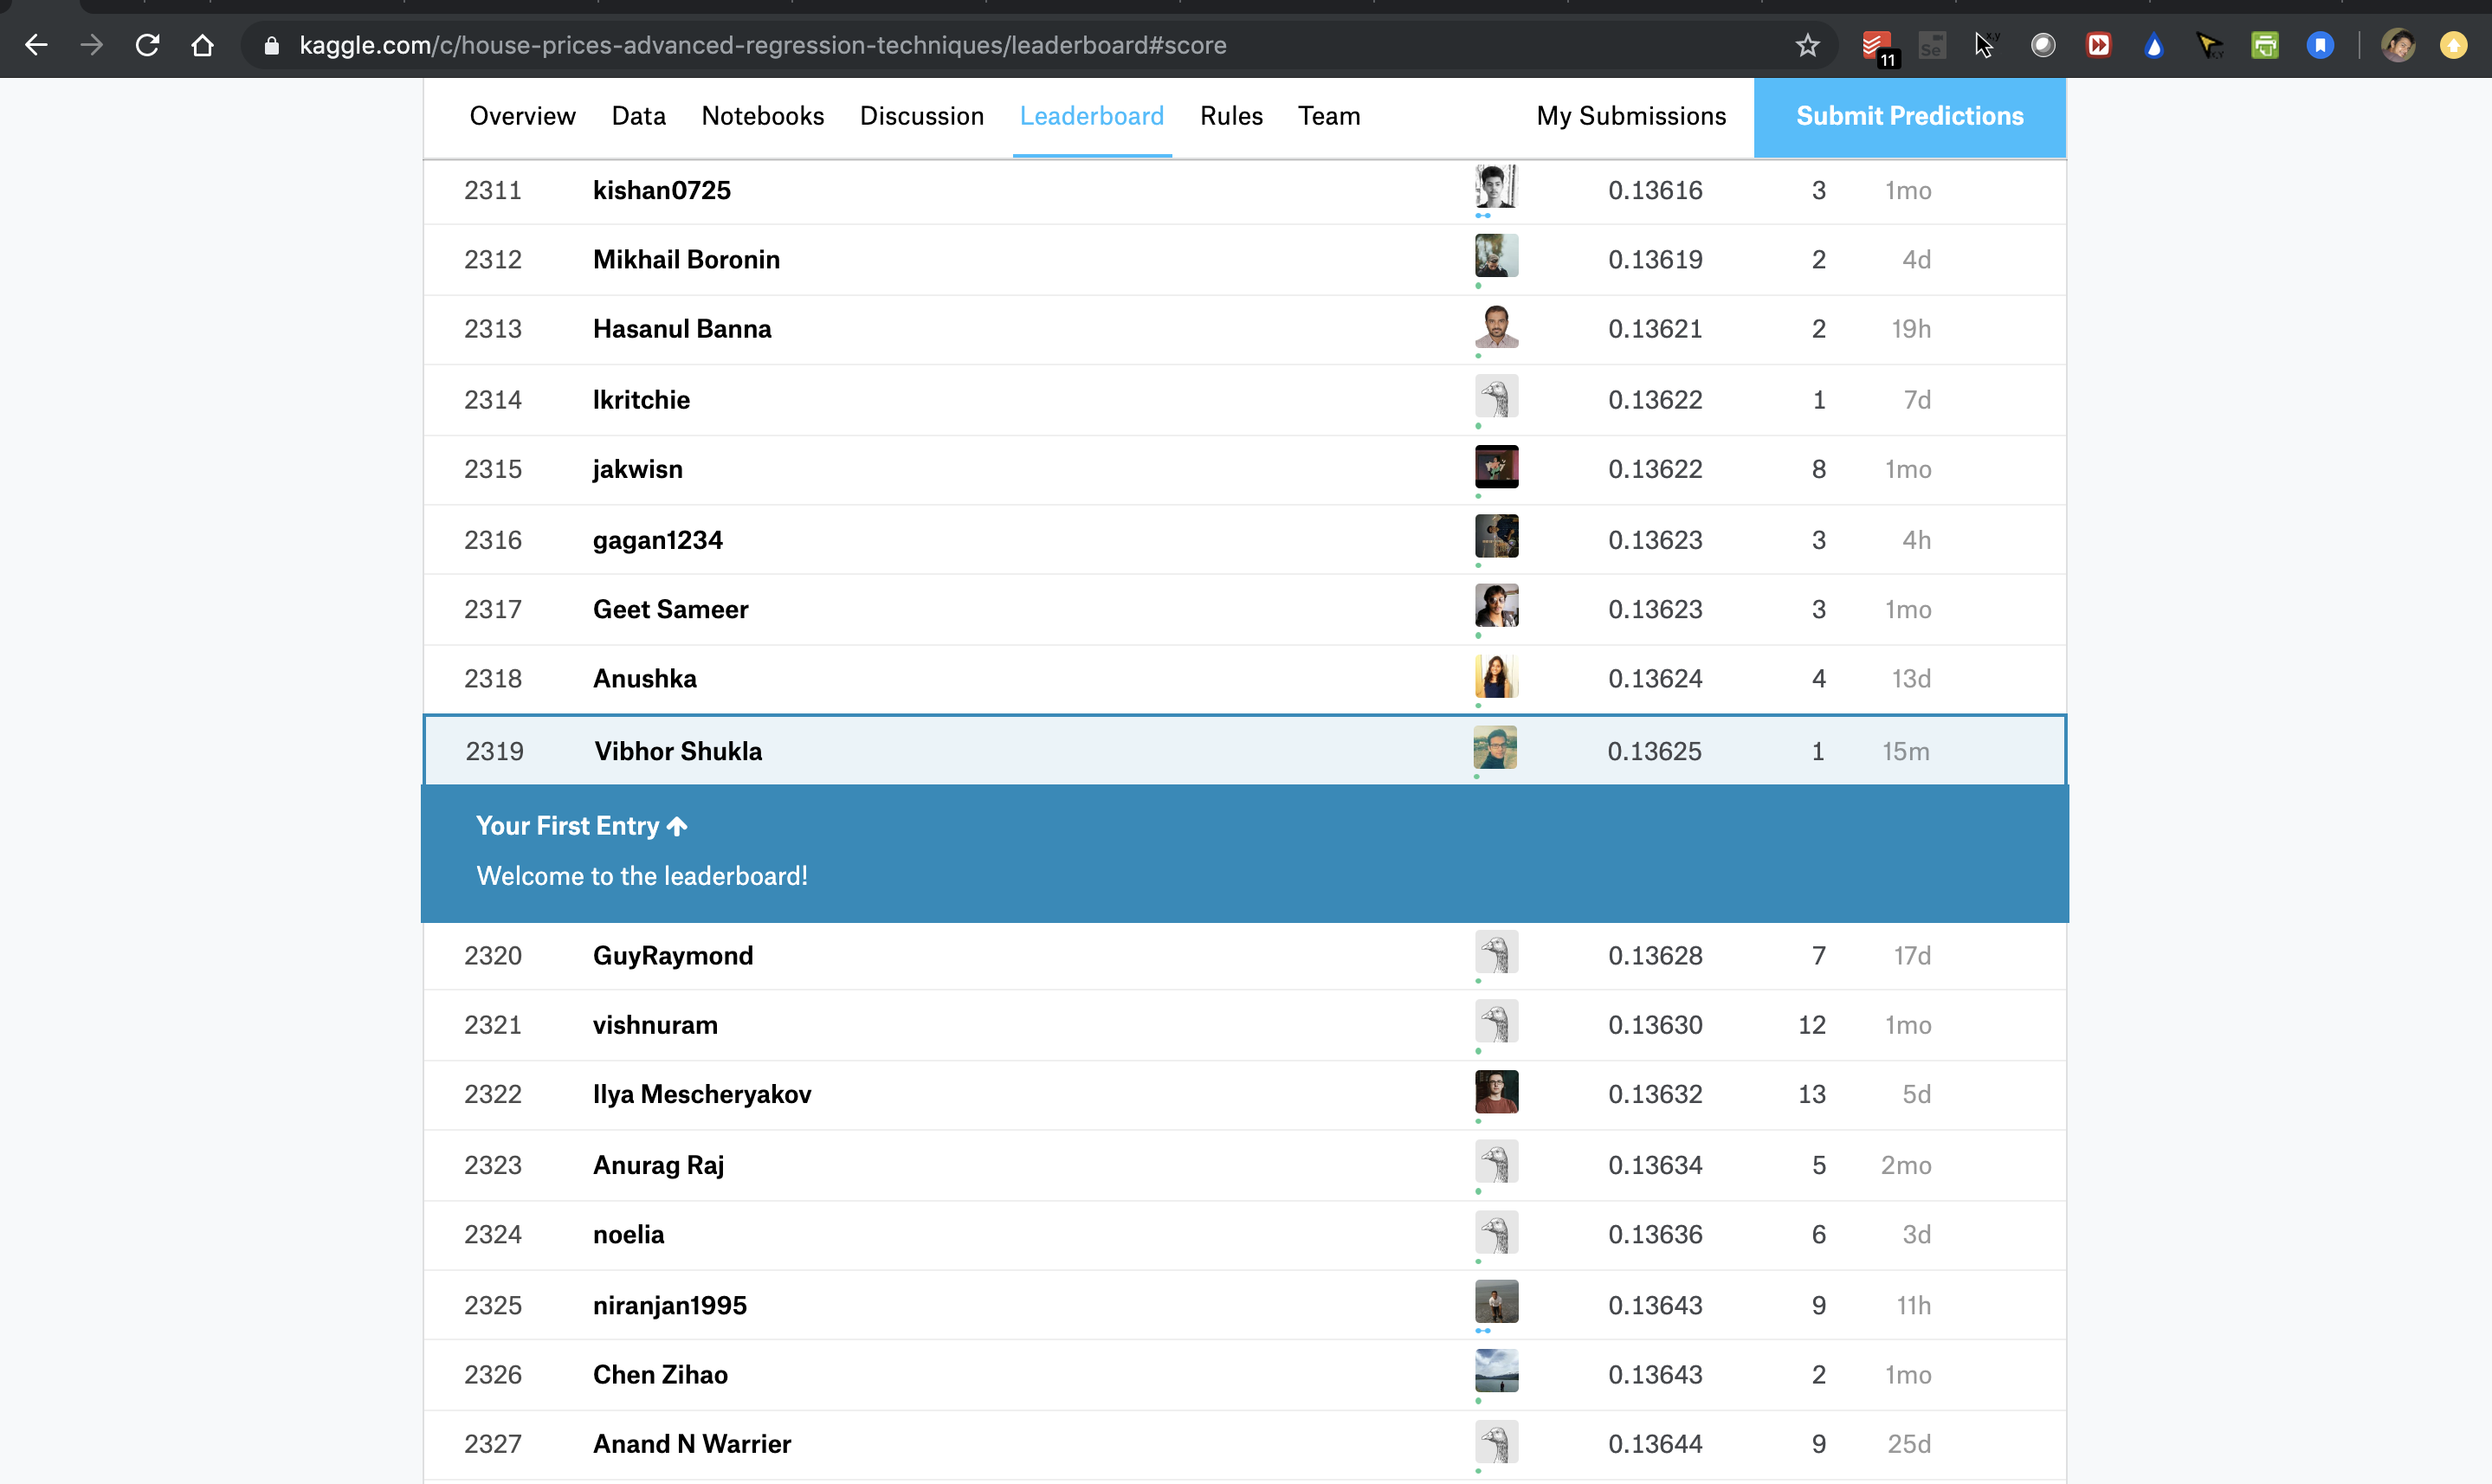